In [1]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.38.0.4-py2.py3-none-any.whl size=177628739 sha256=c8334db453431b55bd0e4a4dc7dcd47c2dab105e75e524a8ac34f2b53f83650c
  Stored in directory: /root/.cache/pip/wheels/6b/1d/65/39927b5984bde22f615b4c6e9a8ee98ea4abf1acb5926623ff
Successfully built h2o


In [2]:
#Connect to a cluster or initialize it if not started
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc5q6i31i
  JVM stdout: /tmp/tmpc5q6i31i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc5q6i31i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_mvrzhi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [4]:
data = h2o.import_file( 'https://raw.githubusercontent.com/aiskunks/The_Economics_of_Happiness/main/TEH/TEH_World_Happiness_2015_2019.csv' )


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
data.describe()

Rows:782
Cols:10

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
type,enum,int,real,real,real,real,real,real,real,int
mins,,1.0,2.693000078,0.0,0.0,0.0,0.0,0.0,0.0,2015.0
mean,,78.69820971867004,5.379017902998721,0.9160474824757038,1.0783924825089533,0.6124155771253205,0.4110908258235294,0.21857584156138085,0.12527520997058825,2016.9936061381088
maxs,,158.0,7.769,2.096,1.644,1.141,0.724,0.838075161,0.55191,2019.0
sigma,,45.18238438270533,1.1274564601618513,0.4073401312916095,0.32954831933364276,0.2483086403761213,0.15288042062428447,0.12232074872244174,0.10584377164077122,1.4173644324240484
zeros,,0,0,5,5,5,5,5,7,0
missing,0,0,0,0,0,0,0,0,0,0
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015.0
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.4363,0.14145,2015.0
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015.0


In [6]:

# Data exploration and munging. Generate scatter plots 

def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


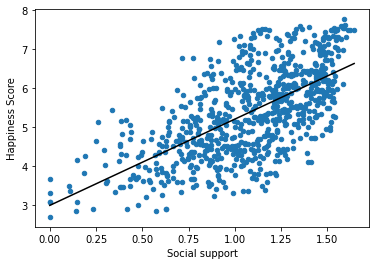

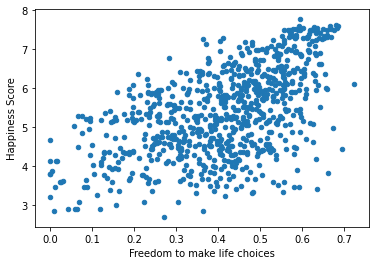

In [7]:
scatter_plot(data, "Social support", "Happiness Score", fit = True)
scatter_plot(data, "Freedom to make life choices", "Happiness Score", max_points = 5000, fit = False)

In [8]:
# Use the .group_by function to countries Happiness Score
grouped = data.group_by("Country")
bpd = grouped.count().sum("Happiness Score").frame
bpd.show()
bpd.describe()
bpd.dim

Country,nrow,sum_Happiness Score
Afghanistan,5,17.564
Albania,5,23.563
Algeria,5,28.338
Angola,4,15.489
Argentina,5,32.297
Armenia,5,21.966
Australia,5,36.381
Austria,5,35.71
Azerbaijan,5,26.146
Bahrain,5,30.569


Rows:170
Cols:3

,Country,nrow,sum_Happiness Score
type,enum,int,real
mins,,1.0,4.369
mean,,4.6,24.74348235379412
maxs,,5.0,37.729999836
sigma,,1.0343222347059453,7.746500942954384
zeros,,0,0
missing,0,0,0
0,Afghanistan,5.0,17.56399991
1,Albania,5.0,23.563000053000003
2,Algeria,5.0,28.338000217


[170, 3]

In [9]:
# Create a test/train split
train,test = data.split_frame([.9])

In [10]:
#  Set response variable and your choice of predictor variables
myY = "Happiness Score"
myX = ["Happiness rank","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]

In [11]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1675695016584_2


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.002242 )  7                             6                              1                       py_10_sid_a369

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.018246362758369206
RMSE: 0.13507909815500402
MAE: 0.10113541639224574
RMSLE: 0.024985888544685184
Mean Residual Deviance: 0.018246362758369206
R^2: 0.9857391709712322
Null degrees of freedom: 708
Residual degrees of freedom: 702
Null deviance: 907.1472050880054
Residual deviance: 12.936671195683767
AIC: -810.631929402911

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.017938327913547374
RMSE: 0.13393404314642104
MAE: 0.10437416958885146
RMSLE: 0.022197107266883554
Mean Residual Deviance: 0.017938327913547374
R^2: 0.9846309815612968
Null degrees of freedom: 72
Residual degrees of freedom: 66
Null deviance: 85.67085257065466
Residual deviance: 1.3094979376889584
AIC: -70.35451522010665

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse        training_deviance     training_mae         training_r2         validation_rmse      validation_deviance    validation_mae       validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -------------------  --------------------  -------------------  ------------------  -------------------  ---------------------  -------------------  ------------------
    2023-02-06 14:50:33  0.000 sec   0             907.1472020287173          1.279474191859968
    2023-02-06 14:50:33  0.050 sec   1                                                           0.13507909815500402  0.018246362758369206  0.10113541639224574  0.9857391709712322  0.13393404314642104  0.017938327913547374   0.10437416958885146  0.9846309815612968

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
Happiness rank                1.06872                1                    0.909541
Perceptions of corruption     0.0390862              0.036573             0.0332647
Social support                0.0307969              0.0288168            0.02621
Generosity                    0.0125655              0.0117575            0.0106939
Freedom to make life choices  0.0120461              0.0112716            0.0102519
Healthy life expectancy       0.0117958              0.0110374            0.0100389
GDP per capita                0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [12]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,10.0,10.0,829.0,1.0,1.0,1.0,2.0,2.0,2.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-02-06 14:50:33,0.030 sec,0.0,1.1311385,0.9423247,1.2794742,1.0833159,0.9034853,1.1735733
,2023-02-06 14:50:34,0.352 sec,1.0,1.0539012,0.8542059,1.1107078,1.0066073,0.8120460,1.0132582
,2023-02-06 14:50:34,0.408 sec,2.0,0.9859917,0.7784810,0.9721796,0.9393344,0.7415492,0.8823491
,2023-02-06 14:50:34,0.439 sec,3.0,0.9250579,0.7152066,0.8557321,0.8796539,0.6767942,0.7737910
,2023-02-06 14:50:34,0.468 sec,4.0,0.8687123,0.6590935,0.7546610,0.8227987,0.6206982,0.6769977
,2023-02-06 14:50:34,0.502 sec,5.0,0.8182371,0.6160437,0.6695119,0.7740895,0.5748107,0.5992145
,2023-02-06 14:50:34,0.519 sec,6.0,0.7714481,0.5708864,0.5951322,0.7280063,0.5314749,0.5299932
,2023-02-06 14:50:34,0.541 sec,7.0,0.7291094,0.5370262,0.5316005,0.6883843,0.4992922,0.4738729


In [13]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor                    |   Normalized Coefficient |
|------------------------------+--------------------------|
| Intercept                    |                5.38649   |
| Happiness rank               |                1.06872   |
| Perceptions of corruption    |                0.0390862 |
| Social support               |                0.0307969 |
| Generosity                   |                0.0125655 |
| Freedom to make life choices |                0.0120461 |
| Healthy life expectancy      |                0.0117958 |
| GDP per capita               |                0         |


[('Happiness rank', 3335.022705078125, 1.0, 1.0),
 ('GDP per capita', 0.0, 0.0, 0.0),
 ('Social support', 0.0, 0.0, 0.0),
 ('Healthy life expectancy', 0.0, 0.0, 0.0),
 ('Freedom to make life choices', 0.0, 0.0, 0.0),
 ('Generosity', 0.0, 0.0, 0.0),
 ('Perceptions of corruption', 0.0, 0.0, 0.0)]

In [14]:
dir(data_glm)

['HGLM',
 'Lambda',
 '_H2OEstimator__default_params',
 '_ModelBase__generate_partial_plots',
 '_ModelBase__generate_user_splits',
 '_ModelBase__grab_values',
 '_ModelBase__plot_1d_pdp',
 '_ModelBase__plot_1d_pdp_multinomial',
 '_ModelBase__plot_2d_pdp',
 '_ModelBase__pred_for_3d',
 '_ModelBase__set_axs_1d',
 '_ModelBase__set_axs_1d_multinomial',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_allowed_metrics',
 '_allowed_metrics_',
 '_bc',
 '_bci',
 '_check_and_save_parm',
 '_check_targets',
 '_default_metric',
 '_default_metrics_',
 '_default_param_value',
 '_end_time',
 '_estimator_type',
 '_fillMultinomialDict',
 '_future',
 '_get_m

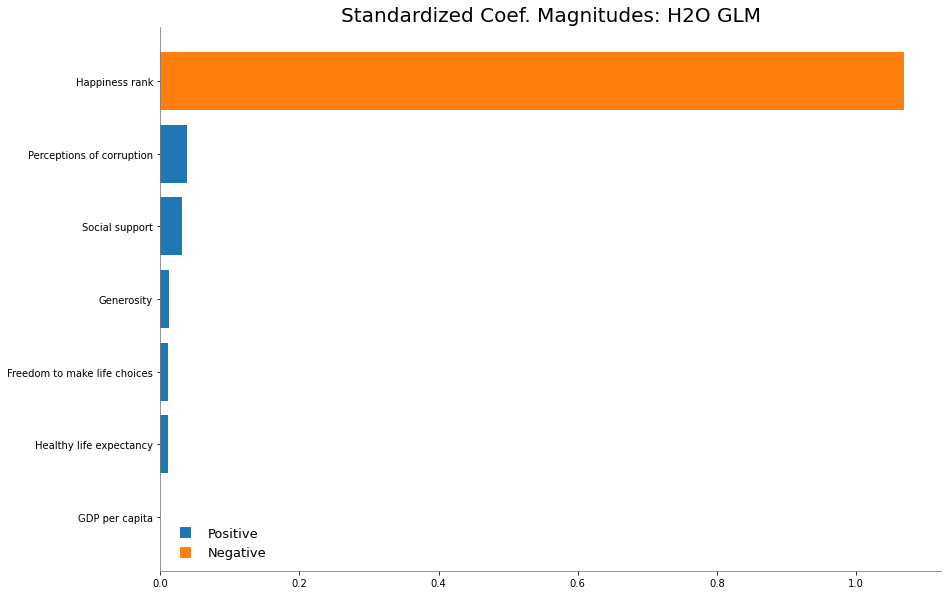

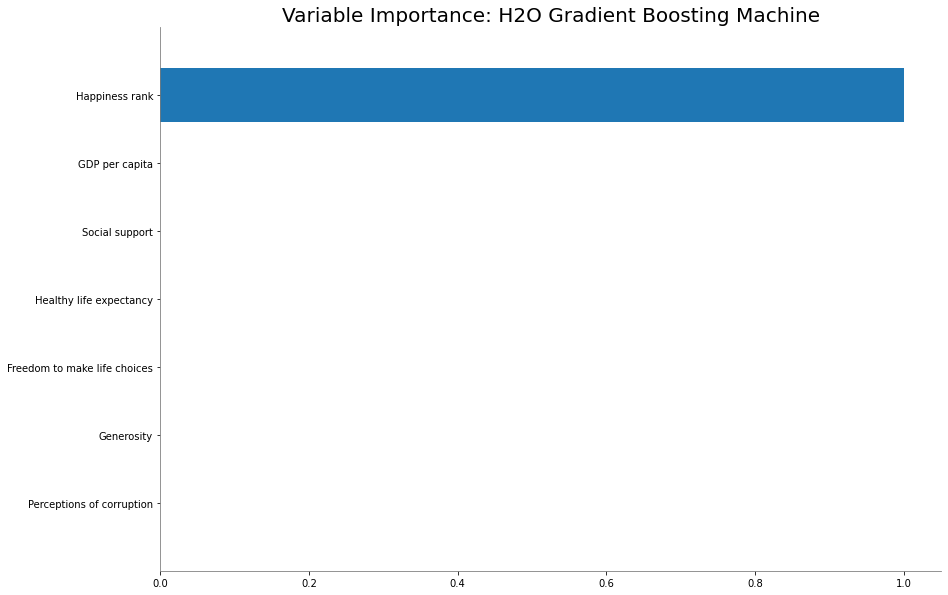

<Figure size 432x288 with 0 Axes>

In [15]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [16]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.3415465012881742
RMSE: 0.5844197988502564
MAE: 0.40304793091807944
RMSLE: 0.09692513146103747
Mean Residual Deviance: 0.3415465012881742

In [17]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [18]:
X=get_independent_variables(train, myY) 
print(X)
print(myY)

['Happiness rank', 'Year', 'Country', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Happiness Score


In [19]:
print(train.columns)

['Country', 'Happiness rank', 'Happiness Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']


In [20]:
train.head()

Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.4363,0.14145,2015
Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
Norway,4,7.522,1.459,1.33095,0.88521,0.66973,0.34699,0.36503,2015
Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,2015
Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.4761,0.31814,2015
Sweden,8,7.364,1.33171,1.28907,0.91087,0.6598,0.36262,0.43844,2015
New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,2015
Israel,11,7.278,1.22857,1.22393,0.91387,0.41319,0.33172,0.07785,2015


In [21]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

In [22]:
model_start_time = time.time()
  
aml.train(x=X,y=myY,training_frame=train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0450948,0.0030593,0.0413131,0.0470162,0.0441502,0.0437935,0.0492008
mean_residual_deviance,0.0040754,0.0009774,0.0029399,0.0038261,0.0043376,0.0036957,0.0055778
mse,0.0040754,0.0009774,0.0029399,0.0038261,0.0043376,0.0036957,0.0055778
null_deviance,181.59364,17.666523,155.8411,183.33592,176.09715,188.70964,203.9844
r2,0.9968208,0.0006337,0.9975445,0.9969308,0.9963031,0.997276,0.9960493
residual_deviance,0.5818439,0.1579531,0.3792499,0.5624336,0.6506368,0.5136975,0.8032017
rmse,0.0634827,0.0075300,0.0542210,0.0618553,0.0658603,0.0607920,0.0746846
rmsle,0.0117536,0.0021953,0.0084166,0.0112715,0.0131708,0.0117265,0.0141827


In [23]:
execution_time = time.time() - model_start_time
print(execution_time)

336.67131066322327


In [24]:
print(aml.leaderboard)

model_id                                                      rmse         mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20230206_145037  0.0640568  0.00410327  0.0451841  0.0119893                0.00410327
XGBoost_grid_1_AutoML_1_20230206_145037_model_23         0.0650683  0.00423389  0.0458579  0.0121071                0.00423389
GBM_grid_1_AutoML_1_20230206_145037_model_36             0.0713432  0.00508985  0.0495497  0.0139473                0.00508985
GBM_grid_1_AutoML_1_20230206_145037_model_15             0.0722839  0.00522496  0.0505011  0.0141435                0.00522496
XGBoost_grid_1_AutoML_1_20230206_145037_model_38         0.0745364  0.00555568  0.0542794  0.0142251                0.00555568
XGBoost_grid_1_AutoML_1_20230206_145037_model_61         0.0770242  0.00593272  0.054252   0.0143178                0.00593272
XGBoost_grid_1_AutoML_1_20230206_145037_model_19         0.08223    0.00676177  0.0613753  0.0151394           

In [25]:
dir(aml)

['_H2OAutoML__frozen',
 '_H2OAutoML__input',
 '_H2OAutoML__validate_algo_parameters',
 '_H2OAutoML__validate_distribution',
 '_H2OAutoML__validate_frame',
 '_H2OAutoML__validate_modeling_plan',
 '_H2OAutoML__validate_monotone_constraints',
 '_H2OAutoML__validate_nfolds',
 '_H2OAutoML__validate_not_set',
 '_H2OAutoML__validate_preprocessing',
 '_H2OAutoML__validate_project_name',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algo_parameters',
 '_build_resp',
 '_custom_distribution_func',
 '_event_log',
 '_fetch',
 '_huber_alpha',
 '_job',
 '_leader_id',
 '_leaderboard',
 '_poll_training_updates',
 '_quantile_alpha',
 '_state_json',
 '_training_info',
 '_tweedie_powe

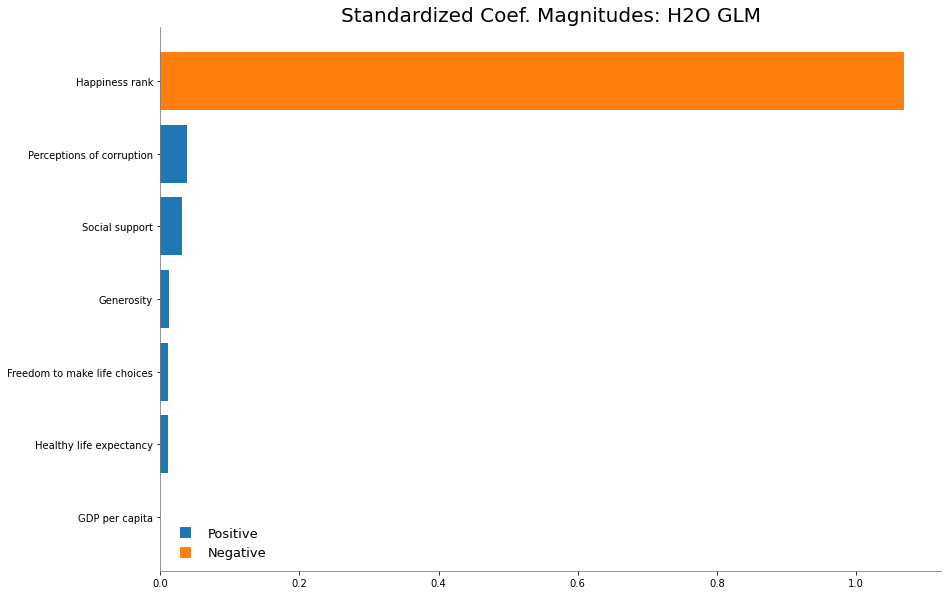

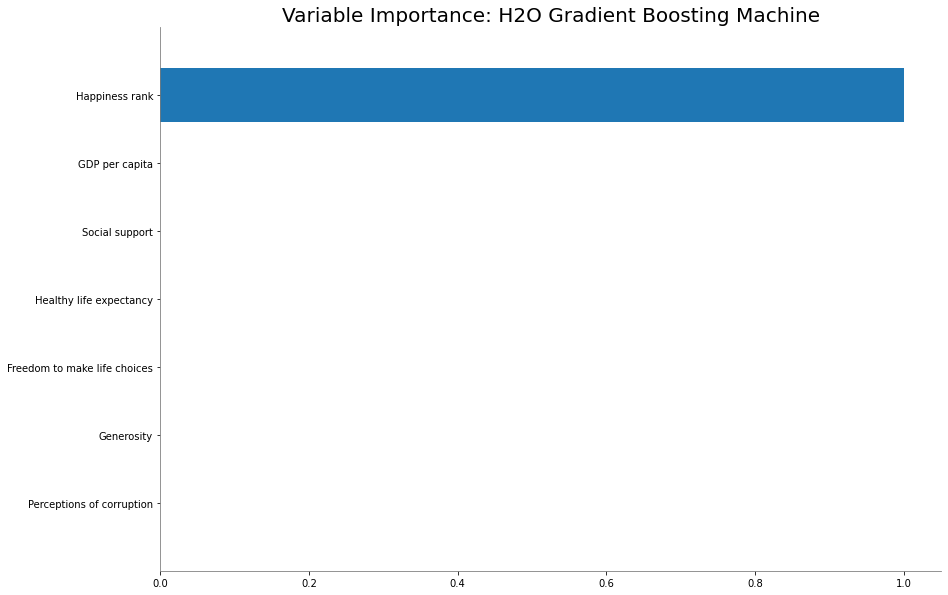

<Figure size 432x288 with 0 Axes>

In [26]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [27]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [28]:
best_model.algo

'stackedensemble'

In [29]:
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()

In [30]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230206_145037',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_4_AutoML_1_20230206_145037'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230206_145037_training_py_10_sid_a369',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230206_145037_training_py_10_sid_a369'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20230206_145037_training_py_10_sid_a369',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20230206_145037_training_py_10_sid_a369'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3

In [31]:
h2o.cluster().shutdown()

H2O session _sid_a369 closed.


LICENSE
MIT License

Copyright (c) 2022 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.